<p style="font-size:78px">Final Project IRWA (2024-2025)</p>

<p style="font-size:48px">Part 2: Indexing and Evaluation</p>

In [4]:
# Standard library imports
import os
import sys

# Third-party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from sklearn.manifold import TSNE
from gensim.models.word2vec import Word2Vec

# Local application imports
current_dir = os.path.dirname(os.path.abspath(__file__)) if '__file__' in locals() else os.getcwd()
project_root = os.path.join(current_dir, '..')
if project_root not in sys.path:
    sys.path.append(project_root)
import irwa.loading as ild 
import irwa.preprocessing as ipp
import irwa.indexing as ind
import irwa.ranking as irk
import irwa.evaluation as eva



# The following lines allow for autoreload of modules. They allow changes in modules without the need to reload the kernel.
#%load_ext autoreload
#%autoreload 2

# 0) Loading and Preprocessing

In [5]:
# Loading
file_path = '../data/farmers-protest-tweets.json'
tweets = ild.load_tweets_from_json(file_path)
print(f"Loaded {len(tweets)} tweets")

# Preprocessing
tweet_document_ids_map_df = "../data/tweet_document_ids_map.csv"
docid_to_tweetid, token_tweets = ipp.create_tokenized_dictionary(tweets, tweet_document_ids_map_df)
print(f"Loaded {len(token_tweets)} documents with their corresponding tokenized tweet content")

Loaded 117407 tweets
Loaded 48429 documents with their corresponding tokenized tweet content


# 1) Indexing

In [6]:
# Create inverted index
inverted_index, tf, idf = ind.create_inverted_index_tf_idf(token_tweets)

In [7]:
# Definition of test queries
query1 = "What is the indian protest?"          
query2 = "Where to support the farmers?"        
query3 = "Who are the Delhi farmers?"          
query4 = "Is the government corrupt?"       
query5 = "What is the president of India doing?"    
query6 = "What do farmers fight for?"     

#### Query 1: What is the indian protest?

In [8]:
# Ranking results with TF-IDF
ranked_documents_1 = irk.rank_documents(ipp.build_terms(query1), token_tweets, inverted_index, tf, idf, filter=irk.conjunctive_filtering)
irk.display_scores_tf_idf(ranked_documents_1, docid_to_tweetid, tweets, 5)


Top 5 Results:
------------------------------------------------------------
RESULT 1
Document doc_34729: 5.031061026856039
Content: Indian farmers' protests: Why they matter to British Indians
#FarmersProtest  https://t.co/kyCWnDVyEm
------------------------------------------------------------
RESULT 2
Document doc_19653: 4.865420574825832
Content: @PunYaab Farmers are Indian ... Each n every person in protest is Indian first ... So think before tweets against protesters 

#farmersprotest
------------------------------------------------------------
RESULT 3
Document doc_33904: 4.592709354323596
Content: Indian farmers' protests: Why they matter to British Indians

#FarmersStandingFirm #FarmersProtest #StandWithFarmers 

https://t.co/ywgPhLCvm9
------------------------------------------------------------
RESULT 4
Document doc_9676: 4.485696129303427
Content: This is why Indian Farmers are protesting #FarmersProtest https://t.co/9mzFBGQaXL
------------------------------------------------

#### Query 2: Where to support the farmers?

In [9]:
# Ranking results with TF-IDF
ranked_documents_2 = irk.rank_documents(ipp.build_terms(query2), token_tweets, inverted_index, tf, idf, filter=irk.conjunctive_filtering)
irk.display_scores_tf_idf(ranked_documents_2, docid_to_tweetid, tweets, 5)


Top 5 Results:
------------------------------------------------------------
RESULT 1
Document doc_43187: 3.0634840969604533
Content: Support farmers support farmers support Twitter #FarmersProtest  #RepealOnlyWayAhead https://t.co/zfRr9uMx8k
------------------------------------------------------------
RESULT 2
Document doc_31878: 3.022813088119693
Content: Support farmers, support humanity #Farmersprotest
------------------------------------------------------------
RESULT 3
Document doc_38864: 3.022813088119693
Content: support farmers support #FarmersProtest 
#शहीद_जवान_शहीद_किसा
------------------------------------------------------------
RESULT 4
Document doc_3699: 2.8275827299999996
Content: Support farmers support truth 
#Pagdi_Sambhal_Jatta

#FarmersProtest
------------------------------------------------------------
RESULT 5
Document doc_47396: 2.8275827299999996
Content: Support farmers all
#MahapanchayatRevolution
#FarmersProtest
Support https://t.co/2Ox6j6rSO5
---------------

#### Query 3: Who are the Delhi farmers?

In [10]:
# Ranking results with TF-IDF
ranked_documents_3 = irk.rank_documents(ipp.build_terms(query3), token_tweets, inverted_index, tf, idf, filter=irk.conjunctive_filtering)
irk.display_scores_tf_idf(ranked_documents_3, docid_to_tweetid, tweets, 5)

Top 5 Results:
------------------------------------------------------------
RESULT 1
Document doc_14534: 5.015985867835725
Content: Farmers are in Delhi for their rights, Delhi Police consider them as your fellow countrymen. #DPstopIntimidatingFarmers 
#FarmersProtest https://t.co/9VqzgkG0Sr
------------------------------------------------------------
RESULT 2
Document doc_29928: 5.006789617141349
Content: Today, the 82nd day of the 'Delhi Chalo' demonstrations at New Delhi boundary areas. A sit-in protest along the Delhi border is being staged by thousands of farmers, 

#FarmersProtest  #DelhiChalo  #ProtestTopStories

https://t.co/O67STnJJ0M
------------------------------------------------------------
RESULT 3
Document doc_38281: 4.669628714307381
Content: I blame the Delhi fog. Otherwise he would have seen protesting farmers when he flew out of Delhi this morning. #FarmersProtest https://t.co/DFMS52Ne0R
------------------------------------------------------------
RESULT 4
Document d

#### Query 4: Is the government corrupt?

In [11]:
# Ranking results with TF-IDF
ranked_documents_4 = irk.rank_documents(ipp.build_terms(query4), token_tweets, inverted_index, tf, idf, filter=irk.conjunctive_filtering)
irk.display_scores_tf_idf(ranked_documents_4, docid_to_tweetid, tweets, 5)


Top 5 Results:
------------------------------------------------------------
RESULT 1
Document doc_14701: 12.3693229312849
Content: Corruption Corruption thats what this Government will be Remembered for #DPstopIntimidatingFarmers
#FarmersProtest https://t.co/7QsxGwbWmr
------------------------------------------------------------
RESULT 2
Document doc_14671: 11.793686669277783
Content: #MSP_किसान_का_हक 
Corruption Corruption thats what this Government will be Remembered for #DPstopIntimidatingFarmers
#FarmersProtest https://t.co/aTNdwitLS9
------------------------------------------------------------
RESULT 3
Document doc_14680: 10.848613870281753
Content: Corruption Corruption thats what this Government will be Remembered for #DPstopIntimidatingFarmers
#FarmersProtest https://t.co/Oxe9SDB01w
#DPstopIntimidatingFarmers
------------------------------------------------------------
RESULT 4
Document doc_37261: 7.558618628101222
Content: @rihanna Shame on India fake media and corrupt governm

#### Query 5: What is the president of India doing?

In [12]:
# Ranking results with TF-IDF
ranked_documents_5 = irk.rank_documents(ipp.build_terms(query5), token_tweets, inverted_index, tf, idf, filter=irk.conjunctive_filtering)
irk.display_scores_tf_idf(ranked_documents_5, docid_to_tweetid, tweets, 5)

Top 5 Results:
------------------------------------------------------------
RESULT 1
Document doc_30908: 10.984752777013997
Content: US Lawyers write to President #Biden on #Farmers' Protests:
'Your administration comes to office at a time when minority communities across India are in peril,' notes the letter, urging the US President to act.
#FarmersProtest https://t.co/wlQVau3nkw
------------------------------------------------------------
RESULT 2
Document doc_31745: 10.246074012813938
Content: it's president's day. 

@joebiden any thoughts about what's been happening in india?? #farmersprotest #nofarmersnofood
------------------------------------------------------------
RESULT 3
Document doc_22798: 8.873360384152438
Content: @POTUS @JoeBiden Mr. President please support Indian farmers #FarmersProtest democracy killed in India..
------------------------------------------------------------
RESULT 4
Document doc_27740: 7.051831766825405
Content: I request US President @JoeBiden to prot

# 2.1) Evaluation - Handout Queries

In [13]:
query_to_ev_1 = "People's rights"
query_to_ev_2 = "Indian Government"

queryid2text = {
    1: query_to_ev_1,
    2: query_to_ev_2
}

scores_evq1 = irk.rank_documents(ipp.build_terms(query_to_ev_1), token_tweets, inverted_index, tf, idf, filter=irk.conjunctive_filtering)
scores_evq2 = irk.rank_documents(ipp.build_terms(query_to_ev_2), token_tweets, inverted_index, tf, idf, filter=irk.conjunctive_filtering)

In [14]:
# Convert the lists to DataFrames
df_query_1 = pd.DataFrame(scores_evq1, columns=['doc_id', 'score'])
df_query_2 = pd.DataFrame(scores_evq2, columns=['doc_id', 'score'])

# Add a column for query_id
df_query_1['query_id'] = 1
df_query_2['query_id'] = 2

# Concatenate the two DataFrames
search_results = pd.concat([df_query_1, df_query_2], ignore_index=True)
search_results = search_results[["query_id", "doc_id", "score"]] #reorder cols

evaluation = pd.read_csv("../data/evaluation_gt.csv", delimiter=";")
results = pd.merge(evaluation, search_results, how='left', left_on=['docId', 'query_id'], right_on=['doc_id', 'query_id'])
results.drop(columns=['doc_id'], inplace=True)
# Fill Nan with 0 as it means that is has not found any relevant score for such query
results.fillna(0, inplace=True)

#Rename columns for better usage
results.columns = ["doc_id", "query_id", "is_relevant", "predicted_relevance"]
results = results[["query_id", "doc_id", "is_relevant", "predicted_relevance"]]

In [15]:
for query in results['query_id'].unique():
    print(query)
    # Count relevant documents for the current query
    relevant_count = results[results['query_id'] == query]['is_relevant'].sum()
    
    print("-------------------------------------------------------------------------------------------")
    print(f"Out of {len(results[results['query_id'] == query])} documents, {relevant_count} are found relevant for query '{queryid2text.get(query, 'Unknown query')}'")
    print("-------------------------------------------------------------------------------------------")

1
-------------------------------------------------------------------------------------------
Out of 30 documents, 15 are found relevant for query 'People's rights'
-------------------------------------------------------------------------------------------
2
-------------------------------------------------------------------------------------------
Out of 30 documents, 15 are found relevant for query 'Indian Government'
-------------------------------------------------------------------------------------------


### Precision@K (P@K)

In [16]:
# Assign the current query
current_query_res = results[search_results["query_id"] == 1]

C:\Users\Usuari\AppData\Local\Temp\ipykernel_6996\2359606978.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  current_query_res = results[search_results["query_id"] == 1]


In [17]:
pre_k10, rec_k10 = eva.precision_at_k(current_query_res["is_relevant"], current_query_res["predicted_relevance"], 10)
pre_k20, rec_k20 = eva.precision_at_k(current_query_res["is_relevant"], current_query_res["predicted_relevance"], 20)


print("==> Precision@{}: {}\n".format(10, pre_k10))
print("==> Precision@{}: {}\n".format(20, pre_k20))

==> Precision@10: 0.8

==> Precision@20: 0.9



### Recall@K (R@k) 

In [18]:
print("==> Recall@{}: {}\n".format(10, rec_k10))
print("==> Recall@{}: {}\n".format(20, rec_k20))

==> Recall@10: 1.0

==> Recall@20: 1.0



### Avgerage Precision@K (P@K)

In [19]:
eva.avg_precision_at_k(np.array(current_query_res["is_relevant"]), np.array(current_query_res["predicted_relevance"]), 15)

np.float64(0.9315667238744164)

In [20]:
k = 15
temp = current_query_res.sort_values("predicted_relevance", ascending=False).head(k)
average_precision_score(np.array(temp["is_relevant"]), np.array(temp["predicted_relevance"][:k]))

np.float64(0.9315667238744159)

### F1-Score@K

In [21]:
print(f"F-1 Score for k = 20 is: {eva.f1_score(pre_k20, rec_k20)}")
print(f"F-1 Score for k = 10 is: {eva.f1_score(pre_k10, rec_k10)}")


F-1 Score for k = 20 is: 0.9473684210526316
F-1 Score for k = 10 is: 0.888888888888889


### Mean Average Precision (MAP)

In [22]:
map_k, avp = eva.map_at_k(results, 15)
map_k

np.float64(0.9255208466746929)

### Mean Reciprocal Rank (MRR)

In [23]:
labels = np.array(results[results['query_id'] == 1]["is_relevant"])
scores = np.array(results[results['query_id'] == 1]["predicted_relevance"])
np.round(eva.rr_at_k(labels, scores, 10), 4)

np.float64(1.0)

In [29]:
mrr = {}
for k in [3, 5, 10]:
    RRs = []
    for q in results['query_id'].unique():  # loop over all query ids
        labels = np.array(results[results['query_id'] == q]["is_relevant"])  # get labels for current query
        scores = np.array(results[results['query_id'] == q]["predicted_relevance"])  # get predicted score for current query
        RRs.append(eva.rr_at_k(labels, scores, k))  # append RR for current query
    mrr[k] = np.round(float(sum(RRs) / len(RRs)), 4)  # Mean RR at current k

In [32]:
print(mrr)

{3: np.float64(1.0), 5: np.float64(1.0), 10: np.float64(1.0)}


### Normalized Discounted Cumulative Gain (NDCG)

In [33]:
k = 10
ndcg_k = np.round(eva.ndcg_at_k(labels, scores, k), 4)
print("ndcg@{} for query with query_id={}: {}".format(k, 1, ndcg_k))

ndcg@10 for query with query_id=1: 1.0


In [34]:
labels = np.array(results[results['query_id'] == 2]["is_relevant"])
scores = np.array(results[results['query_id'] == 2]["predicted_relevance"])
ndcg_k = np.round(eva.ndcg_at_k(labels, scores, k), 4)
print("ndcg@{} for query with query_id={}: {}".format(k, 2, ndcg_k))

ndcg@10 for query with query_id=2: 1.0


In [37]:
ndcgs = []
k = 10
for q in results['query_id'].unique():
    labels = np.array(results[results['query_id'] == q]["is_relevant"])
    scores = np.array(results[results['query_id'] == q]["predicted_relevance"])
    ndcgs.append(np.round(eva.ndcg_at_k(labels, scores, k), 4))

avg_ndcg = np.round(float(sum(ndcgs) / len(ndcgs)), 4)
print("Average ndcg@{}: {}".format(k, avg_ndcg))

Average ndcg@10: 0.9134


# 2.2) Evaluation - Our Queries

## Defining Scores

In [38]:
# Convert the lists to DataFrames
df_q1 = pd.DataFrame(ranked_documents_1, columns=['doc_id', 'score'])
df_q2 = pd.DataFrame(ranked_documents_2, columns=['doc_id', 'score'])
df_q3 = pd.DataFrame(ranked_documents_3, columns=['doc_id', 'score'])
df_q4 = pd.DataFrame(ranked_documents_4, columns=['doc_id', 'score'])
df_q5 = pd.DataFrame(ranked_documents_5, columns=['doc_id', 'score'])


# Add a column for query_id
df_q1['query_id'] = 1
df_q2['query_id'] = 2
df_q3['query_id'] = 3
df_q4['query_id'] = 4
df_q5['query_id'] = 5

# Concatenate the two DataFrames
search_results = pd.concat([df_q1, df_q2, df_q3, df_q4, df_q5], ignore_index=True)
search_results = search_results[["query_id", "doc_id", "score"]] #reorder cols

evaluation = pd.read_csv("../data/evaluation_gt_5queries.csv", delimiter=";")
results = pd.merge(evaluation, search_results, how='left', left_on=['docId', 'query_id'], right_on=['doc_id', 'query_id'])
results.drop(columns=['doc_id'], inplace=True)
# Fill Nan with 0 as it means that is has not found any relevant score for such query
results.fillna(0, inplace=True)

#Rename columns for better usage
results.columns = ["doc_id", "query_id", "is_relevant", "predicted_relevance"]
results = results[["query_id", "doc_id", "is_relevant", "predicted_relevance"]]

In [39]:
search_results.head()

,query_id,doc_id,score
0,1,doc_34729,5.031061
1,1,doc_19653,4.865421
2,1,doc_33904,4.592709
3,1,doc_9676,4.485696
4,1,doc_33299,4.107844


In [40]:
results.head()

,query_id,doc_id,is_relevant,predicted_relevance
0,1,doc_34729,1,5.031061
1,1,doc_19653,0,4.865421
2,1,doc_33904,1,4.592709
3,1,doc_9676,1,4.485696
4,1,doc_40582,0,4.107844


In [41]:
current_query_res = results[results["query_id"] == 2].reset_index(drop=True)

### Precision@K (P@K)

In [42]:
pre_k10, rec_k10 = eva.precision_at_k(current_query_res["is_relevant"], current_query_res["predicted_relevance"], 10)
pre_k20, rec_k20 = eva.precision_at_k(current_query_res["is_relevant"], current_query_res["predicted_relevance"], 20)


print("==> Precision@{}: {}\n".format(10, pre_k10))
print("==> Precision@{}: {}\n".format(20, pre_k20))

==> Precision@10: 0.3

==> Precision@20: 0.25



### Recall@K (R@K)

In [43]:
print("==> Recall@{}: {}\n".format(10, rec_k10))
print("==> Recall@{}: {}\n".format(20, rec_k20))

==> Recall@10: 1.0

==> Recall@20: 1.0



### Average Precision@K (P@K)

In [44]:
eva.avg_precision_at_k(np.array(current_query_res["is_relevant"]), np.array(current_query_res["predicted_relevance"]), 15)

np.float64(0.38690476190476186)

### F1-Score@K

In [45]:
print(f"F-1 Score for k = 20 is: {eva.f1_score(pre_k20, rec_k20)}")
print(f"F-1 Score for k = 10 is: {eva.f1_score(pre_k10, rec_k10)}")

F-1 Score for k = 20 is: 0.4
F-1 Score for k = 10 is: 0.4615384615384615


### Mean Average Precision (MAP)

In [46]:
map_k, avp = eva.map_at_k(results, 15)
map_k

np.float64(0.541133095299762)

### Mean Reciprocal Rank (MRR)

In [47]:
labels = np.array(results[results['query_id'] == 1]["is_relevant"])
scores = np.array(results[results['query_id'] == 1]["predicted_relevance"])
np.round(eva.rr_at_k(labels, scores, 10), 4)

np.float64(1.0)

In [48]:
mrr = {}
for k in [3, 5, 10]:
    RRs = []
    for q in results['query_id'].unique():  # loop over all query ids
        labels = np.array(results[results['query_id'] == q]["is_relevant"])  # get labels for current query
        scores = np.array(results[results['query_id'] == q]["predicted_relevance"])  # get predicted score for current query
        RRs.append(eva.rr_at_k(labels, scores, k))  # append RR for current query
    mrr[k] = np.round(float(sum(RRs) / len(RRs)), 4)  # Mean RR at current k

In [49]:
print(mrr)

{3: np.float64(0.5833), 5: np.float64(0.5833), 10: np.float64(0.6296)}


### Normalized Discounted Cumulative Gain (NDCG)

In [50]:
k = 10
ndcg_k = np.round(eva.ndcg_at_k(labels, scores, k), 4)
print("ndcg@{} for query with query_id={}: {}".format(k, 1, ndcg_k))

ndcg@10 for query with query_id=1: 0.1299


In [51]:
ndcgs = []
k = 10
for q in results['query_id'].unique():
    labels = np.array(results[results['query_id'] == q]["is_relevant"])
    scores = np.array(results[results['query_id'] == q]["predicted_relevance"])
    ndcgs.append(np.round(eva.ndcg_at_k(labels, scores, k), 4))

avg_ndcg = np.round(float(sum(ndcgs) / len(ndcgs)), 4)
print("Average ndcg@{}: {}".format(k, avg_ndcg))

Average ndcg@10: 0.4988


## T-SNE

In [52]:
model = Word2Vec(token_tweets.values(), workers=4, vector_size=100, min_count=50, window=10, sample=1e-3)

NameError: name 'Word2Vec' is not defined

[('bill', 0.8631564974784851), ('black', 0.7057251930236816), ('undemocrat', 0.6934252381324768), ('antiindia', 0.6855990290641785), ('draconian', 0.6844105124473572)]
[('lose', 0.8178851008415222), ('corrupt', 0.7746254205703735), ('suffer', 0.7650794982910156), ('hurt', 0.7636569738388062), ('blood', 0.7607261538505554)]
[('fought', 0.9484066963195801), ('veteran', 0.9224081039428711), ('armi', 0.9032742977142334), ('humili', 0.8738486766815186), ('ex', 0.8148266077041626)]


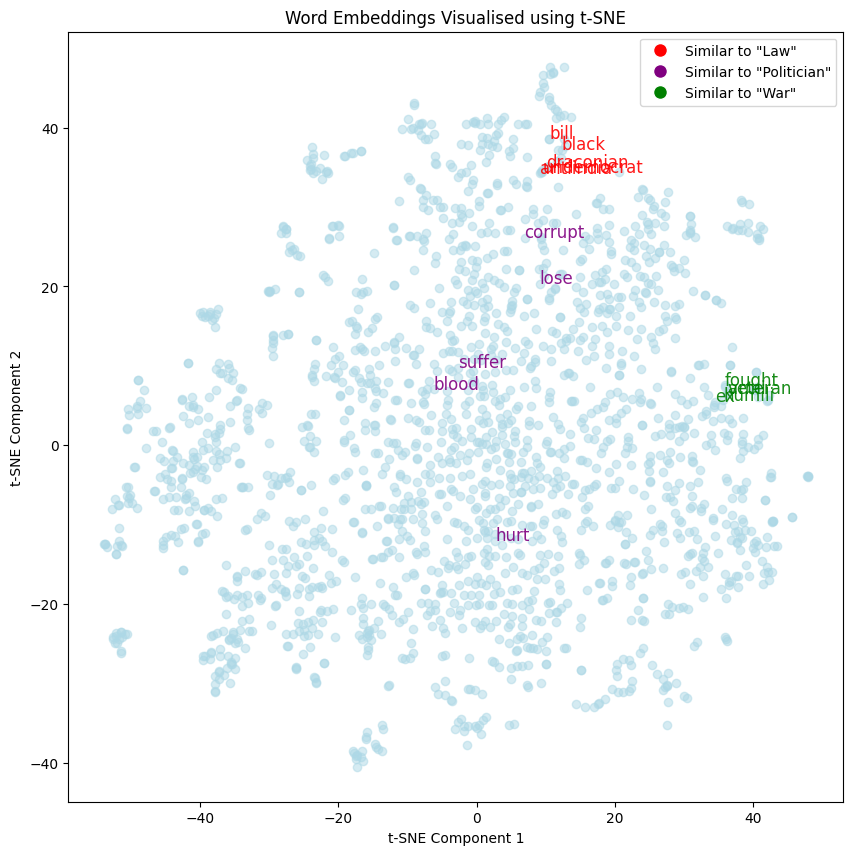

In [59]:
similar_words_1 = model.wv.most_similar('law', topn=5)
print(similar_words_1)
similar_words_2 = model.wv.most_similar('politician', topn=5)
print(similar_words_2)
similar_words_3 = model.wv.most_similar('war', topn=5)
print(similar_words_3)


words1 = set(word for word, _ in similar_words_1)
words2 = set(word for word, _ in similar_words_2)
words3 = set(word for word, _ in similar_words_3)
words_to_label = list(words1.union(words2).union(words3))

# Extract word vectors
X = model.wv[model.wv.index_to_key]
X_tsne = TSNE(n_components=2).fit_transform(X)

# Create the scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5, color="lightblue")

# Add labels for the selected words with different colors
for i, word in enumerate(model.wv.index_to_key):
    if word in words_to_label:
        if word in words1:
            color = 'red'  
        elif word in words2:
            color = 'purple' 
        elif word in words3:
            color = 'green' 
        else:
            color = 'black'  # Default color

        plt.annotate(word, (X_tsne[i, 0], X_tsne[i, 1]), fontsize=12, alpha=0.9, color=color)

# Create legend
red_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Similar to "Law"')
purple_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='Similar to "Politician"')
green_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Similar to "War"')
plt.legend(handles=[red_patch, purple_patch, green_patch], loc='upper right')



plt.title("Word Embeddings Visualised using t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()